## HW3.4

In [1]:
# set up directory
dir_counts <- "~/Documents/Dev/SRCourse/original/Applied-Bioinformatics/Unit2-RNAseq/data/htseq_out/day5"
counts_files <- list.files(dir_counts)

In [2]:
# set up sample info
samplesInfo <- as.data.frame(matrix(ncol=2, nrow=length(counts_files)))  
samplesInfo$samplename <- counts_files  
samplesInfo$filename <- counts_files  
samplesInfo$group <- c("mock", "ZIKV", "mock", "ZIKV", "mock", "ZIKV") 
samplesInfo <- samplesInfo[,-c(1:2)]

In [3]:
samplesInfo
class(samplesInfo)

samplename,filename,group
GSM2580321_counts.txt,GSM2580321_counts.txt,mock
GSM2580322_counts.txt,GSM2580322_counts.txt,ZIKV
GSM2580325_counts.txt,GSM2580325_counts.txt,mock
GSM2580326_counts.txt,GSM2580326_counts.txt,ZIKV
GSM2580329_counts.txt,GSM2580329_counts.txt,mock
GSM2580330_counts.txt,GSM2580330_counts.txt,ZIKV


[1] "data.frame"

In [82]:
library("DESeq2")
dds1 <- DESeqDataSetFromHTSeqCount(sampleTable = samplesInfo, 
                                           directory = dir_counts, 
                                           design = ~ group)

Warning message in DESeqDataSet(se, design = design, ignoreRank):
“some variables in design formula are characters, converting to factors”

In [5]:
colData(dds1)

DataFrame with 6 rows and 1 column
                         group
                      <factor>
GSM2580321_counts.txt     mock
GSM2580322_counts.txt     ZIKV
GSM2580325_counts.txt     mock
GSM2580326_counts.txt     ZIKV
GSM2580329_counts.txt     mock
GSM2580330_counts.txt     ZIKV

In [6]:
dds1_deseq <- DESeq(dds1)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


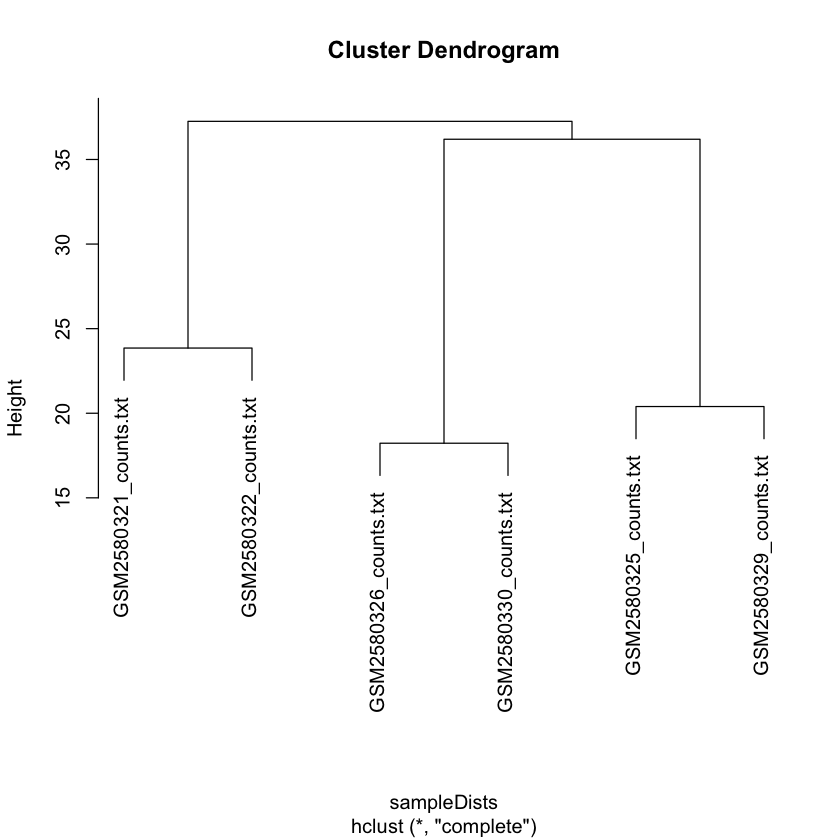

In [7]:
vsd <- varianceStabilizingTransformation(dds1_deseq)
sampleDists <- dist(t(assay(vsd)))
plot(hclust(sampleDists))

## HW3.5
**1) Repeat the hierarchical clustering using rlog-normalized counts instead of vsd.**

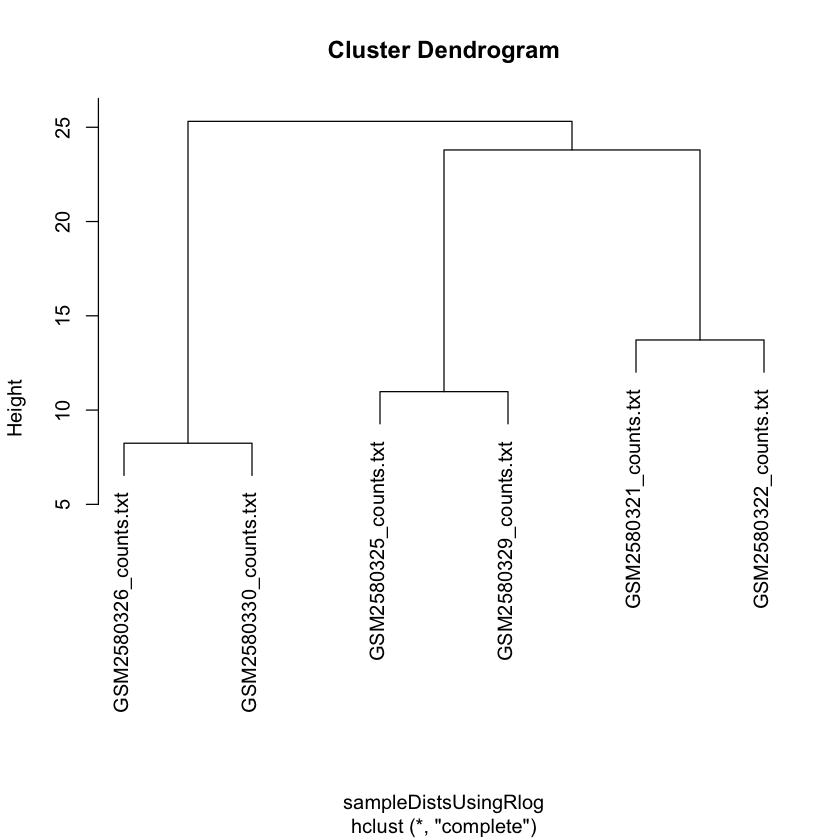

In [8]:
## perform r-log normalization
rld <- rlog(dds1_deseq)
## perform hierarchical clustering using rlog
sampleDistsUsingRlog <- dist(t(assay(rld)))
plot(hclust(sampleDistsUsingRlog))

**2) Examine the normalized counts using `head(assay(vsd))` and `head(assay(rld))`. Now find the corresponding raw counts and plot raw vs normalized counts for the first 6 genes of the first sample. HINT: It is possible to extract elements from `dds1`, including raw counts. **

In [100]:
normalized_vsd  <- assay(vsd)[1:6,1]
normalized_vsd

ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
      10.581933        7.543589       10.112493        9.573418        9.527347 
ENSG00000000938 
       7.517564

In [101]:
normalized_rld <- assay(rld)[1:6, 1]
normalized_rld

ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
      10.196392        2.676511        9.678356        8.948431        8.804458 
ENSG00000000938 
       3.406941

In [102]:
raw_count <- assay(dds1)[1:6, 1]
raw_count

ENSG00000000003 ENSG00000000005 ENSG00000000419 ENSG00000000457 ENSG00000000460 
           1138               6             754             447             426 
ENSG00000000938 
              5

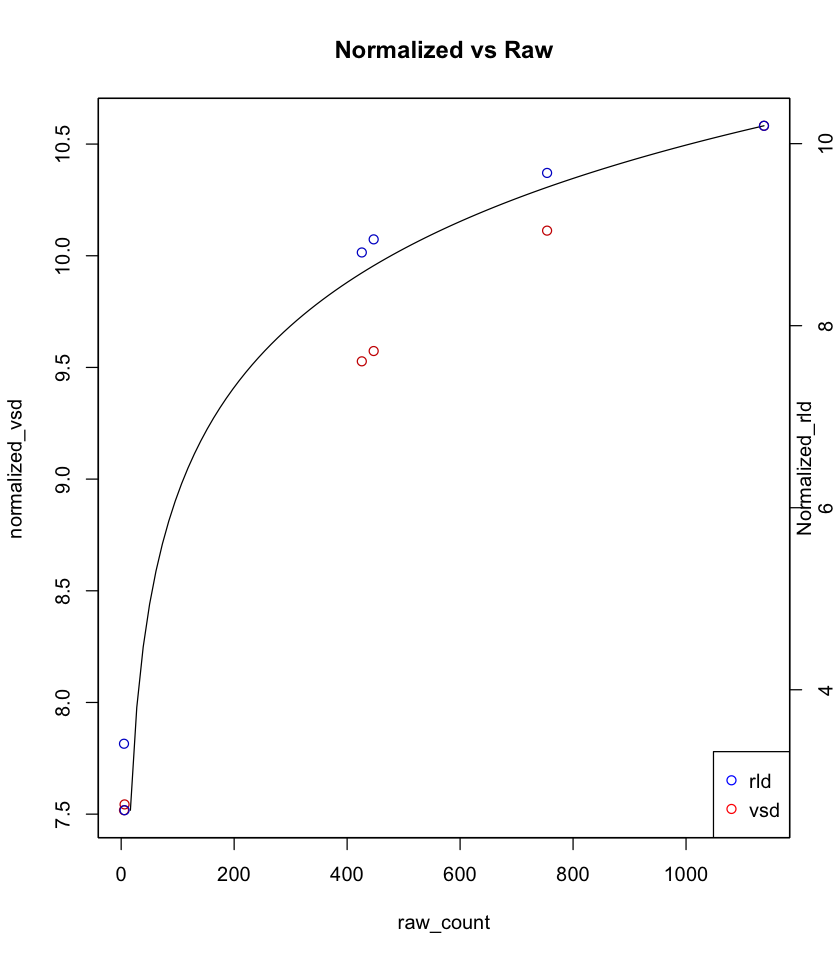

In [203]:
options(repr.plot.width=7, repr.plot.height=8)

plot(raw_count,normalized_vsd, col = "red3", main = "Normalized vs Raw")
par(new = TRUE)
curve(log(x), xlab="", ylab = "", xaxt= "n", yaxt = "n")
par(new = TRUE)
plot(raw_count,normalized_rld, col = "blue3", xlab = "", ylab = "", xaxt = "n", yaxt = "n")
axis(side = 4)
mtext("Normalized_rld", side = 4, line = 0.1)
legend("bottomright", c("rld", "vsd"),
       col = c("blue", "red"), pch = c(1,1))



---